# Travelling salesman problem - BFS and DFS search

**Set of cities:** cities are points with coordinates x, y on a plane with height as z coordinate. 

**Moving:** cost of going from city A to city B is equal to the Euclidean distance between two cities, if there exists a road. Two scenarios criteria:
* There are all the direct connections / e.g. 80% of possible connections
* The problem is symmetrical / asymmetrical (if asymmetrical – going up is height +10%, going down: -10%)

**Choosing coordinates:** randomly from the range <-100, 100> for x, y and <0, 50> for z.


In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
random.seed(1234)
cities = []
for i in range (0,7):
  cities.append([i, random.uniform(-100,100), random.uniform(-100,100), random.uniform(0,50)])   #the first element is the identifier of our city

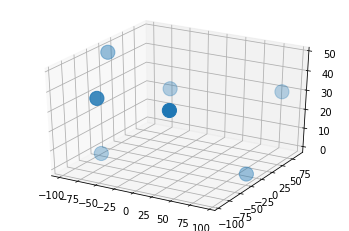

In [ ]:
df = pd.DataFrame(cities)

ax = plt.axes(projection='3d')
ax.scatter3D(df[1], df[2], df[3], cmap='Greens', s=200)

In [ ]:
def euclidean(point1, point2, sym):
  #this function measures the distance only from point 1 to point 2, not both directions
  #a point has to be presented as a list: [x, y, z]
  #sym = True/False - if the problem is symmetrical or asymmetrical

  euclidean = ((point1[1]-point2[1])**2 + (point1[2]-point2[2])**2 + (point1[3]-point2[3])**2)**(1/2)

  if sym == True:
    return euclidean
  elif sym == False:
    if point2[2]>point1[2]:
      return euclidean*1.1
    elif point2[2]<point1[2]:
      return euclidean*0.9
    else:
      return euclidean

In [ ]:
euclidean(cities[1], cities[2], False)

160.0918516866843

**Map representation:** a weighted (directed) graph, where cities are the nodes and roads are the edges of the graph.

In [ ]:
def create_graph(nodes, conn, sym):
  #function creates the directed graph, connects nodes with each other with weighted edges (using euclidean function)
  #conn is a number (0,1] - indicates how much % of possible connections we want to implement
  #sym = True/False    if the problem is symmetrical or asymmetrical - this argument will be forwarded to euclidean function

  poss_conn_num = len(nodes) * (len(nodes) - 1)   #number of all possible connections

  if conn > 1 or conn <= 0: raise ValueError

  edges = []

  for k in range (0, len(nodes)):
    for i in range (0, len(nodes)):
      if i != k:
        edges.append([nodes[k], nodes[i], euclidean(nodes[k], nodes[i], sym)])

  if conn <= 1 and conn > 0: 
    rem_conn_num = round(poss_conn_num*(1-conn))     #number of paths we need to remove
    for i in range (0, rem_conn_num):
      del edges[random.randrange(0, len(edges))]
  
  return edges

We randomly remove some of the edges (if the *conn* attribute would not be 1, what means 100% of possible connections).

In [ ]:
graph = create_graph(cities, 0.8, False)

In [ ]:
graph[4]  #route from city A to city B

[[1, 82.19519248982482, 87.8537994727528, 29.111378652947455],
 [3, -52.63804492737645, -93.83719565467801, 39.43863586181418],
 203.84209626583174]

**Solving the traveling salesman problem:** The salesman starts from a chosen city and has to visit every city exactly once before returning to the starting city. The goal is to find a path with the lowest cost.

**Task:** Implement a full search of the graph, using BFS and DFS methods to solve the traveling salesman problem.

In [ ]:
#choosing the departure city (and saving its index as a variable)
citystart = cities[0][0]

### **Breadth First Search (BFS)**

In [ ]:
def bfs_paths(departure_point):

  #departure point id
  start = departure_point

  #creating the QUEUE and add the departure point
  queue = deque()
  queue.append([[start], 0])    #each element consists of a list of nodes and the distance traveled

  while len(queue)!=0 and len(queue[0][0])<len(cities):

    #removing from the queue the first element and set it as a new departure point
    curr = queue.popleft()
    start = curr[0][-1]

    #creating a set of the visited cities
    visited = set(curr[0])
    
    #searching for the route extensions and appending the extended elements to the queue
    for path in graph:
      if path[0][0] == start and path[1][0] not in visited:
        route = curr[0].copy() 
        route.append(path[1][0])
        dist = curr[1] + path[2]
        queue.append([route, dist])

  return queue

In [ ]:
res = bfs_paths(citystart)
len(res)

192

Now we will artificially add the inicial start point at the end of our obtained routes (as long as an edge like this exists).

In [ ]:
for path in graph:
  if path[1][0] == citystart:
    for resolution in res:
      if resolution[0][-1]==path[0][0]:
        resolution[0].append(citystart)
        resolution[1] = resolution[1] + path[2]
len(res)

192

We remove the routes that didn't get the end point (because there is no edge to it).

In [ ]:
for resolution in deque(res):
  if len(resolution[0]) <= len(cities):
    res.remove(resolution)
len(res)

150

We find the shortest available path.

In [ ]:
if len(res) != 0:
  print(pd.DataFrame(res).sort_values(by=1).head(1))
else:
  print("No results")

                           0           1
21  [0, 1, 4, 6, 5, 3, 2, 0]  618.962868


### **Depth First Search (DFS)**

In [ ]:
def dfs_paths(departure_point):

  #departure point id
  start = departure_point

  #available full paths
  res=[]

  #creating the STACK and add the departure point
  stack = []
  stack.append([[start], 0])    #each element consists of a list of nodes and the distance traveled

  while len(stack)!=0:
    curr = stack.pop()
    start = curr[0][-1]

    visited = set(curr[0])

    childcounter = 0
    for path in graph:
      if path[0][0] == start and path[1][0] not in visited:
        route = curr[0].copy() 
        route.append(path[1][0])
        dist = curr[1] + path[2]
        stack.append([route, dist])
        childcounter += 1
    
    if childcounter == 0:
      if len(curr[0]) == len(cities):
        res.append(curr)

  return res

In [ ]:
res = dfs_paths(citystart)
len(res)

192

In [ ]:
for path in graph:
  if path[1][0] == citystart:
    for resolution in res:
      if resolution[0][-1]==path[0][0]:
        resolution[0].append(citystart)
        resolution[1] = resolution[1] + path[2]
len(res)

192

In [ ]:
for resolution in list(res):
  if len(resolution[0]) <= len(cities):
    res.remove(resolution)
len(res)

150

In [ ]:
if len(res) != 0:
  print(pd.DataFrame(res).sort_values(by=1).head(1))
else:
  print("No results")

                            0           1
128  [0, 1, 4, 6, 5, 3, 2, 0]  618.962868
